<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#固有値" data-toc-modified-id="固有値-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>固有値</a></span></li><li><span><a href="#Googleのページランク" data-toc-modified-id="Googleのページランク-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Googleのページランク</a></span><ul class="toc-item"><li><span><a href="#課題" data-toc-modified-id="課題-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>課題</a></span></li></ul></li><li><span><a href="#累乗(べき乗)法により最大固有値が求まる原理" data-toc-modified-id="累乗(べき乗)法により最大固有値が求まる原理-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>累乗(べき乗)法により最大固有値が求まる原理</a></span></li><li><span><a href="#Jacobi回転による固有値の求め方" data-toc-modified-id="Jacobi回転による固有値の求め方-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Jacobi回転による固有値の求め方</a></span><ul class="toc-item"><li><span><a href="#Mapleでみる回転行列" data-toc-modified-id="Mapleでみる回転行列-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Mapleでみる回転行列</a></span></li><li><span><a href="#C-言語での実装" data-toc-modified-id="C-言語での実装-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>C 言語での実装</a></span></li></ul></li><li><span><a href="#数値計算ライブラリーについて" data-toc-modified-id="数値計算ライブラリーについて-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>数値計算ライブラリーについて</a></span><ul class="toc-item"><li><span><a href="#python謹製-lapack利用逆行列" data-toc-modified-id="python謹製-lapack利用逆行列-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>python謹製 lapack利用逆行列</a></span></li><li><span><a href="#計算速度競争" data-toc-modified-id="計算速度競争-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>計算速度競争</a></span></li></ul></li><li><span><a href="#課題" data-toc-modified-id="課題-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>課題</a></span><ul class="toc-item"><li><span><a href="#行列のpprint設定イロイロ" data-toc-modified-id="行列のpprint設定イロイロ-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>行列のpprint設定イロイロ</a></span></li></ul></li></ul></div>

<br />

<div style="text-align: center;">
<font size="7">線形代数-固有値(LAEigen)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/laeigenvectors</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017 </font>
</div>






# 固有値

$A$を対称正方行列，$x$をベクトルとしたときに，
$$
Ax = \lambda x
$$
の解，$\lambda$(lambda)を固有値，$x$を固有ベクトルという．$x$がゼロベクトルではない意味のある解は特性方程式det$(A-\lambda E)=0$が成り立つときにのみ得られる．

この特性方程式をpythonで特には，sympyってのを使わないといけない．一応示しておくと，

$$
\begin{align}
  A\, &= \, \left( \begin {array}{cc} 3&2/3\\2/3&2\end {array} \right) \\
 \det( A\, - t E) &= 
\, \det \left( \begin {array}{cc} 3-t&2/3\\2/3& 2-t \end {array} \right) \\
& = t^2 -5t + 6 - 4/9
\\
& = t^2 -5t + 50/9 \\
t (\lambda) &=  10/3,\,5/3
\end{align}
$$




In [1]:
from sympy import *
t = symbols('t')
A = Matrix([[3, 2/3],[2/3,2]]
)
xx = diag(t,t)
pprint(xx)
eq1 = simplify((A-xx).det())
pprint(eq1)
solve(eq1,t)

⎡t  0⎤
⎢    ⎥
⎣0  t⎦
 2                         
t  - 5⋅t + 5.55555555555556


[1.66666666666667, 3.33333333333333]

固有値を求めるコマンドEigenvectorsを適用すると，固有値と固有ベクトルが求まる．ここで，固有ベクトルは行列の列(Column)ベクトルに入っている．

In [2]:
import pprint
import scipy.linalg   # SciPy Linear Algebra Library

A = scipy.array([[3, 2/3],[2/3,2]])
l, V = scipy.linalg.eig(A)
pprint.pprint(l)
pprint.pprint(V)
pprint.pprint(V[:,0]) # columnの取り出し方

array([3.33333333+0.j, 1.66666667+0.j])
array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])
array([0.89442719, 0.4472136 ])


<ipython-input-2-d7ee8a9d901c>:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  A = scipy.array([[3, 2/3],[2/3,2]])


固有ベクトルは規格化されている．

# Googleのページランク

>多くの良質なページからリンクされているページはやはり良質なページである

Googleのpage rankは上のような非常に単純な仮定から成り立っている．ページランクを実際に求めよう．つぎのようなリンクが張られたページ(有向グラフ)を考える．

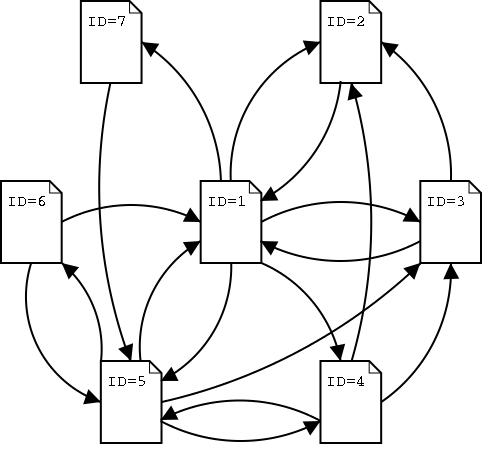


計算手順は以下の通り
1.  リンクを再現する**隣接行列**を作る．ページに番号をつけて，その間が結ばれているi-j要素を1，そうでない要素を0とする．
1.  隣接行列を**転置**する
1.  列ベクトルの総和が1となるように**規格化**する．
1.  こうして得られた**推移確率行列**の最大固有値に属する固有ベクトルを求め，適当に規格化する．


## 課題 

1.  上記手順を参考にして，pythonでページランクを求めよ．
1.  このような問題ではすべての固有値・固有ベクトルを求める必要はなく，最大の固有値を示す固有ベクトルを求めるだけでよい．初期ベクトルを適当に決めて，何度も推移確率行列を掛ける反復法でページランクを求めよ．
<dl>
<dt>隣接行列</dt><dd></dd>
</dl>

$$
{\it A1}\, := \, \left[ \begin {array}{c|c|c|c|c|c|c|c} 
&1&2&3&4&5&6&7\\
1&0&1&1&1&1&0&1\\
2&1&0&0&0&0&0&0\\
3& & & & & & & \\
4& & & & & & & \\
5& & & & & & & \\
6& & & & & & & \\
7& & & & & & & 
\end {array} \right] 
$$
<dl>
<dt>転置行列</dt><dd></dd>
</dl>

$$
{Transpose}({\it A1})\, := \, \left[ \begin {array}{c|c|c|c|c|c|c} 
0 &\, \, &\, \, &\, \, &\, \, &\, \, &\, \, \\
1& & & & & & \\
1& & & & & & \\
1& & & & & & \\
1& & & & & & \\
0& & & & & & \\
1& & & & & & 
\end {array} \right] 
$$
<dl>
<dt>規格化</dt><dd></dd>
</dl>

$$
\left[ \begin {array}{c|c|c|c|c|c|c} 
\, \, &\, \, &\, \, &\, \, &\, \, &\, \, &\, \, \\
& & & & & & \\
& & & & & & \\
& & & & & & \\
& & & & & & \\
& & & & & & \\
& & & & & & 
\end {array} \right] 
$$
<dl>
<dt>遷移</dt><dd></dd>
</dl>

$$
\left( \begin {array}{ccccccc} 
0 &1 &1/2 &0 &1/4 &1/2 &0 \\
1/5 &0 &1/2 &1/3 &0 &0 &0 \\
1/5 &0 &0 &1/3 &1/4 &0 &0 \\
1/5 &0 &0 &0 &1/4 &0 &0 \\
1/5 &0 &0 &1/3 &0 &1/2 &1 \\
0 &0 &0 &0 &1/4 &0 &0 \\
1/5 &0 &0 &0 &0 &0 &0 
\end {array} \right) 
\left( \begin {array}{c} 
1/7\\ 
1/7\\ 
1/7\\ 
1/7\\ 
1/7\\ 
1/7\\ 
1/7 
\end {array} \right) \, = \, 
\left( \begin {array}{ccccccc} 
\, \, &\, \, &\, \, &\, \, &\, \, &\, \, &\, \, \\
& & & & & & \\
& & & & & & \\
& & & & & & \\
& & & & & & \\
& & & & & & \\
& & & & & & 
\end {array} \right)
\, = \, \left( \begin {array}{c} 
0.32\\ 
0.15\\ 
0.11\\ 
0.06\\ 
0.29\\ 
0.04\\ 
0.03 
\end {array} \right) 
$$




In [6]:
from pprint import pprint
from numpy import array, zeros, diagflat, dot, transpose
from scipy.linalg import eig

A = array([[0,1,1,1,1,0,1],
           [1,0,0,0,0,0,0],
           [1,1,0,0,0,0,0],
           [0,1,1,0,1,0,0],
           [1,0,1,1,0,1,0],
           [1,0,0,0,1,0,0],
           [0,0,0,0,1,0,0]])

diag = []
for i in range(0,7):
    tmp = 0.0
    for j in range(0,7):
        tmp += A[i,j]
    diag.append(1.0/tmp)

D = diagflat(diag)
tA = dot(transpose(A),D)
print(tA)
x = array([1/7,1/7,1/7,1/7,1/7,1/7,1/7])
pprint(dot(tA,dot(tA,x)))

l, V = eig(tA)
v0 = V[:,0]
pprint(v0)


[[0.         1.         0.5        0.         0.25       0.5
  0.        ]
 [0.2        0.         0.5        0.33333333 0.         0.
  0.        ]
 [0.2        0.         0.         0.33333333 0.25       0.
  0.        ]
 [0.2        0.         0.         0.         0.25       0.
  0.        ]
 [0.2        0.         0.         0.33333333 0.         0.5
  1.        ]
 [0.         0.         0.         0.         0.25       0.
  0.        ]
 [0.2        0.         0.         0.         0.         0.
  0.        ]]
array([0.29404762, 0.14166667, 0.15833333, 0.13690476, 0.13214286,
       0.07261905, 0.06428571])
array([0.69945653+0.j, 0.38286042+0.j, 0.32395882+0.j, 0.24296911+0.j,
       0.41231122+0.j, 0.1030778 +0.j, 0.13989131+0.j])


In [7]:
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) 
#pprint(A)
pprint(D)
#pprint(transpose(A))
pprint(dot(transpose(A),D))
x = array([1,0,0,0,0,0,0])
#pprint(x)
#pprint(dot(tA,dot(tA,dot(tA,x))))
l, V = eig(tA)
v0 = V[:,0]
#pprint(v0)

array([[ 0.200,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000],
       [ 0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000],
       [ 0.000,  0.000,  0.500,  0.000,  0.000,  0.000,  0.000],
       [ 0.000,  0.000,  0.000,  0.333,  0.000,  0.000,  0.000],
       [ 0.000,  0.000,  0.000,  0.000,  0.250,  0.000,  0.000],
       [ 0.000,  0.000,  0.000,  0.000,  0.000,  0.500,  0.000],
       [ 0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000]])
array([[ 0.000,  1.000,  0.500,  0.000,  0.250,  0.500,  0.000],
       [ 0.200,  0.000,  0.500,  0.333,  0.000,  0.000,  0.000],
       [ 0.200,  0.000,  0.000,  0.333,  0.250,  0.000,  0.000],
       [ 0.200,  0.000,  0.000,  0.000,  0.250,  0.000,  0.000],
       [ 0.200,  0.000,  0.000,  0.333,  0.000,  0.500,  1.000],
       [ 0.000,  0.000,  0.000,  0.000,  0.250,  0.000,  0.000],
       [ 0.200,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000]])
array([0.69945653+0.j, 0.38286042+0.j, 0.32395882+0.j, 0.24296911+0.j,
       0.41231122

# 累乗(べき乗)法により最大固有値が求まる原理

累乗(べき乗)法は，最大固有値とその固有ベクトルを効率的に見つける算法である．すこし，固有値について復習しておく．正方行列$A$に対して，
$$
A x = \lambda x
$$
の解$\lambda$を固有値，$x$を固有ベクトルという．$\lambda$は，
$$
\det( A - \lambda E) =0
$$
として求まる永年方程式の解である．

では，なぜ適当な初期ベクトル$x_0$から始めて，反復
$$
x_{k+1} = A x_k
$$
を繰り返すと，$A$の絶対値最大の固有値に属する固有ベクトルに近づいていくのかを見ておこう．

すべての固有値がお互いに異なる場合を考える．今，行列の固有値を絶対値の大きなもの順に並べて，$|\lambda_1|>|\lambda_2|>\cdots>|\lambda_n|$とし，対応する長さを1に規格化した固有ベクトルを$x_1, x_2, \ldots, x_n$とする．初期ベクトルは固有ベクトルの線形結合で表わせて，
$$
X_0 = c_1x_1+c_2x_2+\cdots+c_nx_n
$$
となるとする．これに行列$A$を$N$回掛けると，
$$
A^N X_0 = c_1 \lambda_1^N x_1+
c_2  \lambda_2^N x_2+\cdots+
c_n  \lambda_n^N x_n
$$
となる．これを変形すると，
$$
A^NX_0 = X_{N}
= c_1 \lambda_1^N \left\{ x_1+
\frac{c_2}{c_1}\left(\frac{\lambda_2}{\lambda_1}\right)^N  x_2+\cdots+
\frac{c_n}{c_1}\left(\frac{\lambda_n}{\lambda_1}\right)^N  x_n \right\}
$$
となる．$|\lambda_1|>|\lambda_i|(i\ge2)$だから括弧の中は$x_1$だけが生き残る．

こうして最大固有値に属する固有ベクトルが，反復計算を繰り返すだけで求められる．





# Jacobi回転による固有値の求め方

固有値を求める手法として，永年方程式を解くというやり方は回りくどすぎる．少し古めかしいが非対角要素を0にする回転行列を反復的に作用させるJacobi(ヤコビ)法を紹介する．現在認められている最適の方策は，ハウスホルダー(Householder)変換で行列を単純な三重対角化行列に変形してから，反復法で解を追い込んでいくやり方である．Jacobi法は，Householder法ほど万能ではないが，10次程度までの行列には今でも役に立つ．

$$
B :=  \left[{
\begin{array}{ccccccc}
\cdot & \cdot & 0 & 0 & 0 & 0\\
\cdot & \cdot & \cdot & 0 & 0 & 0\\
0 & \cdot & \cdot & \cdot & 0 \\
0 & 0 & \cdot & \cdot & \cdot & 0
\end{array}}
\right] 
$$


## Mapleでみる回転行列 

行列の軸回転の復習をする．対称行列$B$に回転行列$U$を作用すると
$$
B.U =  
\left(
\begin{array}{cc}
{a_{1\,1}} & {a_{1\,2}}\\
{a_{2\,1}(={a_{1\,2}})} & {a_{2\,2}}
\end{array}
\right)
\left( 
\begin{array}{cc}
\cos(\theta) &  -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{array}
\right) 
$$

となる．回転行列を4x4の行列に
$$
U^t B U
$$
と作用させたときの各要素の様子を以下に示した．
```maple
> restart:
> n:=4:
> with(LinearAlgebra):
> B:=Matrix(n,n,shape=symmetric,symbol=a);
```

$$
B :=  \left[{
\begin{array}{cccc}
{a_{1, \,1}} & {a_{1, \,2}} & {a_{1, \,3}} & {a_{1, \,4}} \\
{a_{1, \,2}} & {a_{2, \,2}} & {a_{2, \,3}} & {a_{2, \,4}} \\
{a_{1, \,3}} & {a_{2, \,3}} & {a_{3, \,3}} & {a_{3, \,4}} \\
{a_{1, \,4}} & {a_{2, \,4}} & {a_{3, \,4}} & {a_{4, \,4}}
\end{array}}
\right] 
$$

c = cos($\theta$)

s = sin($\theta$)

```maple
> U:=Matrix(n,n,[[c,-s,0,0],[s,c,0,0],[0,0,1,0],[0,0,0,1]]);

#U:=Matrix(n,n,[[c,-s],[s,c]]);
```
$$
U :=  \left[ 
{\begin{array}{ccrr}
c &  - s & 0 & 0 \\
s & c & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array}}
\right] 
$$

```maple
>TT:=Transpose(U).B.U;
```

$$
\mathit{TT} :=  \\ \notag
{\begin{array}{c}
\left[ \right.  
(c\,{a_{1, \,1}} + s\,{a_{1, \,2}})\,c + (c\,{a_{1, \,2}} + s
\,{a_{2, \,2}})\,s\,, \, - (c\,{a_{1, \,1}} + s\,{a_{1, \,2}})\,s
+ (c\,{a_{1, \,2}} + s\,{a_{2, \,2}})\,c\,,  \\
c\,{a_{1, \,3}} + s\,{a_{2, \,3}}\,, \,c\,{a_{1, \,4}} + s\,{a_{2
, \,4}}   \left. \right]  \\
\left[ \right.  
( - s\,{a_{1, \,1}} + c\,{a_{1, \,2}})\,c + ( - s\,{a_{1, \,2
}} + c\,{a_{2, \,2}})\,s\,, \, - ( - s\,{a_{1, \,1}} + c\,{a_{1, 
\,2}})\,s + ( - s\,{a_{1, \,2}} + c\,{a_{2, \,2}})\,c\,,  \\
- s\,{a_{1, \,3}} + c\,{a_{2, \,3}}\,, \, - s\,{a_{1, \,4}} + c
\,{a_{2, \,4}}   \left. \right] \\
\left[   c\,{a_{1, \,3}} + s\,{a_{2, \,3}}\,, \, - s\,{a_{1, 
\,3}} + c\,{a_{2, \,3}}\,, \,{a_{3, \,3}}\,, \,{a_{3, \,4}}  
\right]  \\
\left[   c\,{a_{1, \,4}} + s\,{a_{2, \,4}}\,, \, - s\,{a_{1, 
\,4}} + c\,{a_{2, \,4}}\,, \,{a_{3, \,4}}\,, \,{a_{4, \,4}}  
\right] 
\end{array}}
$$

```maple
>expand(TT[1,1]);
expand(TT[2,2]);
expand(TT[1,2]);
expand(TT[2,1]);
```
$$
c^{2}\,{a_{1, \,1}} + 2\,c\,s\,{a_{1, \,2}} + s^{2}\,{a_{2, \,2}}
$$
$$
s^{2}\,{a_{1, \,1}} - 2\,c\,s\,{a_{1, \,2}} + c^{2}\,{a_{2, \,2}}
$$
$$
- s\,c\,{a_{1, \,1}} - s^{2}\,{a_{1, \,2}} + c^{2}\,{a_{1, \,2}}
+ c\,s\,{a_{2, \,2}}
$$
$$
- s\,c\,{a_{1, \,1}} - s^{2}\,{a_{1, \,2}} + c^{2}\,{a_{1, \,2}}
+ c\,s\,{a_{2, \,2}}
$$
この非対角要素を0にする$\theta$は以下のように求まる．

|　　　　　　　　  |
|:----|

このとき注目している$i,j=1,2$以外の要素も変化する．
```maple
>expand(TT[3,1]);
expand(TT[3,2]);
```
$$
c\,{a_{1, \,3}} + s\,{a_{2, \,3}}
$$
$$
- s\,{a_{1, \,3}} + c\,{a_{2, \,3}}
$$
これによって一旦0になった要素も値を持つが，なんども繰り返すことによって，徐々に0へ近づいていく．





## C 言語での実装

lapack_codes/c_versions/Jacobi2.c にコードを入れている．
```bash
$ gcc Jacobi2.c
$ a.out < input.txt
```

で固有値を求めていく過程が表示される．

``` c
#include <stdio.h>
#include <math.h>

#define M 10
void PrintMatrix(double a[M][M], int n);

int main(void){
  double a[M][M],v[M][M];
  double eps=0.0001,div,r,t,s,c,apj,aqj,aip,aiq,vip,viq;
  int i,j,n,iter,count,iterMax=1000000,p,q;
  
  scanf("%d",&n);
  for(i=1;i<=n;i++){
    for(j=1;j<=n;j++) scanf("%lf",&a[i][j]);
  }
  PrintMatrix(a,n);
  for(i=1;i<=n;i++){
    for(j=1;j<=n;j++) v[i][j]=0.;    
    v[i][i]=1.;
  }
  
  for(iter=1;iter<=iterMax;iter++){
    count=0;
    for(p=1;p<=n-1;p++){
      for(q=p+1;q<=n;q++){
	if(fabs(a[p][q])<eps) continue;
	count++;
	div=a[p][p]-a[q][q];
	if (div != 0.0){
	  r=2.0*a[p][q]/div;
	  t=0.5*atan(r);
	} else {
	  t=0.78539818;
	}
	s=sin(t);
	c=cos(t);
	for(j=1;j<=n;j++){
	  apj=a[p][j];
	  aqj=a[q][j];
	  a[p][j]=apj*c+aqj*s;
	  a[q][j]=-apj*s+aqj*c;
	}
	for(i=1;i<=n;i++){
	  aip=a[i][p];
	  aiq=a[i][q];
	  a[i][p]=aip*c+aiq*s;
	  a[i][q]=-aip*s+aiq*c;
	  vip=v[i][p];
	  viq=v[i][q];
	  v[i][p]=vip*c+viq*s;
	  v[i][q]=-vip*s+viq*c;
	}
	printf("p,q=%3d,%3d\n",p,q);
	PrintMatrix(a,n);
      }
    }
    if (count==0) break;
  }
  printf("Eigen values:\n");
  for(i=1;i<=n;i++) printf("%6.2f",a[i][i]);
  printf("\nEigen vectors:\n");
  PrintMatrix(v,n);
  
  return 0;
}

void PrintMatrix(double a[M][M], int n){
  int i,j;
  for(i=1;i<=n;i++){
    for(j=1;j<=n;j++) printf("%6.2f",a[i][j]);
    printf("\n");
  }
  printf("\n");
}
```

``` bash
a.out < input.txt 
  5.00  4.00  1.00  1.00
  4.00  5.00  1.00  1.00
  1.00  1.00  4.00  2.00
  1.00  1.00  2.00  4.00

p,q=  1,  2
  9.00 -0.00  1.41  1.41
 -0.00  1.00 -0.00 -0.00
  1.41 -0.00  4.00  2.00
  1.41 -0.00  2.00  4.00

p,q=  1,  3
  9.37 -0.00  0.00  1.88
 -0.00  1.00  0.00 -0.00
  0.00  0.00  3.63  1.57
  1.88 -0.00  1.57  4.00

p,q=  1,  4
  9.96 -0.00  0.47  0.00
 -0.00  1.00  0.00  0.00
  0.47  0.00  3.63  1.50
  0.00  0.00  1.50  3.41

p,q=  3,  4
  9.96 -0.00  0.35 -0.32
 -0.00  1.00  0.00  0.00
  0.35  0.00  5.02  0.00
 -0.32  0.00 -0.00  2.01

p,q=  1,  3
  9.99 -0.00  0.00 -0.32
 -0.00  1.00  0.00  0.00
 -0.00  0.00  5.00  0.02
 -0.32  0.00  0.02  2.01

p,q=  1,  4
 10.00 -0.00 -0.00  0.00
 -0.00  1.00  0.00  0.00
 -0.00  0.00  5.00  0.02
 -0.00  0.00  0.02  2.00

p,q=  3,  4
 10.00 -0.00 -0.00  0.00
 -0.00  1.00  0.00 -0.00
 -0.00  0.00  5.00 -0.00
  0.00 -0.00 -0.00  2.00

p,q=  1,  3
 10.00 -0.00 -0.00  0.00
 -0.00  1.00  0.00 -0.00
 -0.00  0.00  5.00  0.00
  0.00 -0.00  0.00  2.00

Eigen values:
 10.00  1.00  5.00  2.00
Eigen vectors:
  0.63 -0.71 -0.32  0.00
  0.63  0.71 -0.32  0.00
  0.32  0.00  0.63 -0.71
  0.32  0.00  0.63  0.71
```

# 数値計算ライブラリーについて

- この辺りに記述しているC, Python, Maple, ruby言語のコードは，numerical_calc/lapack_codesにおいている


一般の数値計算ライブラリーについては，時間の関係で講義ではその能力を紹介するにとどめる．昔の演習で詳しく取り上げていたので，研究や今後のために必要と思うときは，テキストを取りにおいで．

行列の計算は，数値計算の中でも特に利用する機会が多く，また，律速ルーチンとなる可能性が高い．そこで，古くから行列計算の高速ルーチンが開発されてきた．なかでもBLASとLAPACKはフリーながら非常に高速である． 

前回に示した，逆行列を求める単純なLU分解法をC言語でコーディングしたものと，LAPACKのルーチンを比べた場合，1000次元の行列で計測すると
```maple
>  1000 [dim]     2.5200 [sec] #BOB
>  1000 [dim]     0.4700 [sec] #LAPACK
```
となった．2006年に初めてこの計算に用いたPCはMacBook(2GHz, Intel Core Duo)であるが，
この計算での0.47秒は1.4GFLOPに相当する．
07年のMacBook(2GHz, Intel Core 2 Duo)ではさらに速くなって
```maple
bob% gcc -O3 bob.c -o bob
bob% ./bob
1000
 1000 [dim]     1.7543 [sec] #BOB
bob% gcc -O3 lapack.c -llapack -lblas -o lapack
bob% ./lapack
1000
 1000 [dim]     0.1893 [sec] #LAPACK
```
で，3.5GFLOPSが出ている．今(2016年)は，MacBookAir(2.2GHz, Intel Core i7)で...
top500.orgが毎年２回High Performance Computerのランクを発表している．
今は，Top1は100PFlopsであるが，
初回の1994年6月の500位は0.4GFlopsで，今のlaptopがはるかに凌いでいる．
まさにlaptopスパコンの時代なんですよ．

ライブラリーは世界中の計算機屋さんがよってたかって検証しているので，バグがほとんど無く，また，高速である．
初学者はライブラリーを使うべきである．ただし，下のサンプルプログラムの行列生成の違いのように，ブラックボックス化すると思わぬ間違い（ここではFortranとCでの行列の並び順の違いが原因)をしでかすことがあるので，プログラムに組み込む前に必ず小さい次元(サンプルコード)で検証しておくこと\footnote{少し前(2002年ごろ)GotoBLASが開発されて，性能が10%ほども上がった}．

添付のコードはちょっと長いが時間があればフォローせよ．コンパイルは，OSXでは
```maple
> gcc -O3 -UPRINT lapack.c -llapack -lblas
```
とすればできる．linuxではLAPACK, BLASがインストールされていれば，
```maple
> #include <vecLib/vecLib.h>
```
をコメントアウトして，
```maple
> gcc -O3 -DPRINT lapack.c -L/usr/local/lib64 -llapack -lblas -lg2c
```
などとすればコンパイルできるはず．




## python謹製 lapack利用逆行列

In [5]:
import numpy as np
import scipy.linalg as la
import time

sizes = [1000, 2000, 4000]
for n in sizes:
    A = np.random.random((n, n))
    b = np.random.random((n))
    start = time.time()
    la.lapack.dgesv(A, b)
    print('%s [dim], %10.5f [sec] # python' % (n,time.time()-start))

1000 [dim],    0.10614 [sec] # python
2000 [dim],    0.50773 [sec] # python
4000 [dim],    2.25623 [sec] # python


|size|elapsed_time[sec]|
|:----|----:|
|100  |0.004878|
|1000 |0.085786|
|10000|46.031718|

## 計算速度競争


Mapleと，C, pythonで競争させてみました．Cはそのままです．Mapleは
``` octave
with(LinearAlgebra):
data:=[1000,2000,4000];
for n in data do
  A:=RandomMatrix(n,n,generator = 0..1.0):
  b:=RandomVector(n,generator = 0..1.0):
  st:=time();
  LUDecomposition(<A|b>):
  print(time()-st);
end:
```

です．pythonのcodeは，lapackにあるdgesvを指定して
呼び出すようにしています．scipy.laのsolveでは何を使っているかはよくわからないので．


結果は，次の通りです．

|size|Maple[sec]|C[sec]|python[sec]|
|:----|-----:|-----:|------:|
|1000 | 0.339|0.0589|0.04101
|2000 | 1.384|0.3826|0.12682
|4000 |45.482|3.0111|0.81373

pythonの圧勝ですね．絶対値はあまり意味がありません．MacBook Air(13-inch, Early 2015/2.2GHz Core i7, ElCapitan 10.11.6)ですが，softのversionにもよります．

ただし，どんなrandomを生成しているかで結果は大きく変わるので，ちょっと怪しいです．
たとえば，MapleのRandomMatrixでgeneratorを指定しないと
size=1000でも9.773[sec]ととんでもないぐらい時間がかかります．

MapleではさらにRandomMatrixの生成にも時間がかかります．
MapleではNAGのライブラリを使っているので．．．

# 課題

1.  次の行列$A$　の固有値をpythonで求めよ．
また，対角化行列$P$ を求めて，対角化せよ．
$$  A\, = \, \left[ \begin {array}{ccc} 4&5&5\\
-4&-5&-7 \\
4&4&6
\end {array} \right]
$$


In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) 

A = np.array([[0,1,-2],[-3,7,-3],[3,-5,5]])
l, P = np.linalg.eig( A )
print(l)
print(P)

[ 1.000  9.000  2.000]
[[-0.905  0.229 -0.707]
 [-0.302  0.688  0.000]
 [ 0.302 -0.688  0.707]]


In [2]:
from pprint import pprint
dA = np.dot(np.linalg.inv(P),np.dot(A,P))
np.set_printoptions(precision=3, suppress=True)
print(format(dA))

[[ 1.  0.  0.]
 [-0.  9. -0.]
 [ 0.  0.  2.]]


## 行列のpprint設定イロイロ

In [8]:
from pprint import pprint
dA = np.dot(np.linalg.inv(P),np.dot(A,P))
pprint(format(dA))

'[[ 1.  0. -0.]\n [-0.  9. -0.]\n [ 0.  0.  2.]]'


In [9]:
np.set_printoptions(precision=3)
pprint(dA)

array([[ 1.,  0., -0.],
       [-0.,  9., -0.],
       [ 0.,  0.,  2.]])


In [10]:
np.set_printoptions(precision=3, suppress=True)
pprint(dA)

array([[ 1.,  0., -0.],
       [-0.,  9., -0.],
       [ 0.,  0.,  2.]])


In [11]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) 
pprint(dA)

array([[ 1.000,  0.000, -0.000],
       [-0.000,  9.000, -0.000],
       [ 0.000,  0.000,  2.000]])
